# POST-GRADUATION ADMISSION PREDICTION

400 applicants have been surveyed as potential students for Post Graduation Admission. The university weighs certain aspects of a student's education to determine their acceptance.
The objective is to explore what kind of data is provided, determine the most important factors that contribute to a student's chance of admission, and select the most accurate model to predict the probability of admission.

The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are :

-GRE Scores ( out of 340 )

-TOEFL Scores ( out of 120 )

-University Rating ( out of 5 )

-Statement of Purpose and Letter of Recommendation Strength ( out of 5 )

-Undergraduate GPA ( out of 10 )

-Research Experience ( either 0 or 1 )

-Chance of Admit ( ranging from 0 to 1 ) is the Target Variable

Models

-Logistic Regression

-Random Forest

-Decision Tree

# LOAD THE DATA AND ANALYSIS OF VARIABLES

In [1]:
#Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv (r'C:\Users\nijha\Downloads\Admission_Predict.csv')

In [3]:
print(df.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')


# DATA PREPROCESSING 

In [4]:
df.head() #read first five rows

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.tail() #read last five rows 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [6]:
df.sample(5) #To get five random rows back

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
12,13,328,112,4,4.0,4.5,9.10,1,0.78
74,75,314,106,3,3.0,5.0,8.90,0,0.74
137,138,316,100,2,1.5,3.0,8.16,1,0.71
134,135,333,113,5,4.0,4.0,9.28,1,0.89
2,3,316,104,3,3.0,3.5,8.00,1,0.72


# DATA EXPLORATION

Basic statistics of data:

In [7]:
df.describe() 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


This shows some descriptive statistics on the data set. It only shows the statistics on the numerical columns. 
From here you can see the following statistics:

Row count, which aligns to what the shape attribute showed us.

-The mean, or average.

-50% aka Median it is very import to understand Skeweness of the Data.

-The standard deviation, or how spread out the data is.

-The minimum and maximum value of each column

-The number of items that fall within the first, second, and third percentiles.

# DATA VISUALISATION

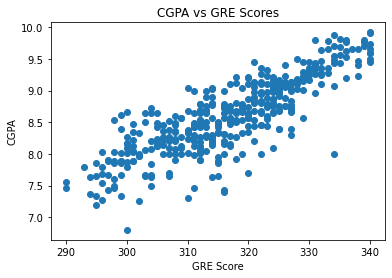

In [8]:
import matplotlib.pyplot as plt
plt.scatter(df['GRE Score'],df['CGPA'])
plt.title("CGPA vs GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

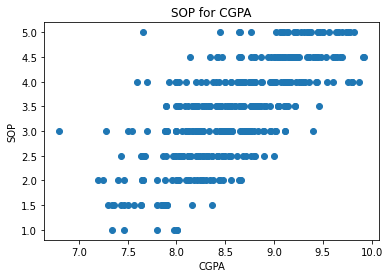

In [9]:
plt.scatter(df["CGPA"],df.SOP)
plt.xlabel("CGPA")
plt.ylabel("SOP")
plt.title("SOP for CGPA")
plt.show()

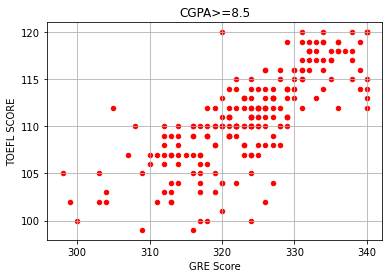

In [10]:
df[df.CGPA >= 8.5].plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="red")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.5")
plt.grid(True)
plt.show()

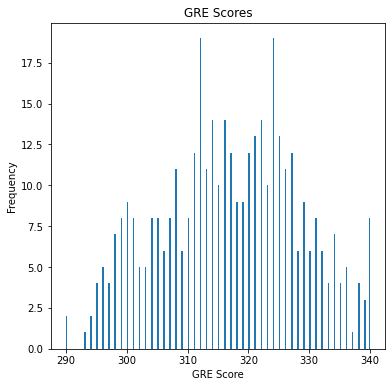

In [11]:
df["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

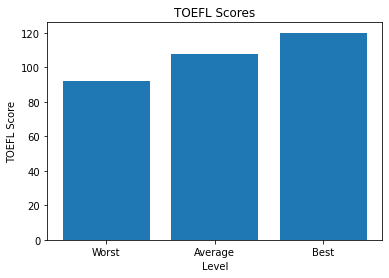

In [12]:
import numpy as np
y = np.array([df["TOEFL Score"].min(),df["TOEFL Score"].mean(),df["TOEFL Score"].max()])
x = ["Worst","Average","Best"]
plt.bar(x,y)
plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()

In [13]:
df.dtypes
df.shape

(400, 9)

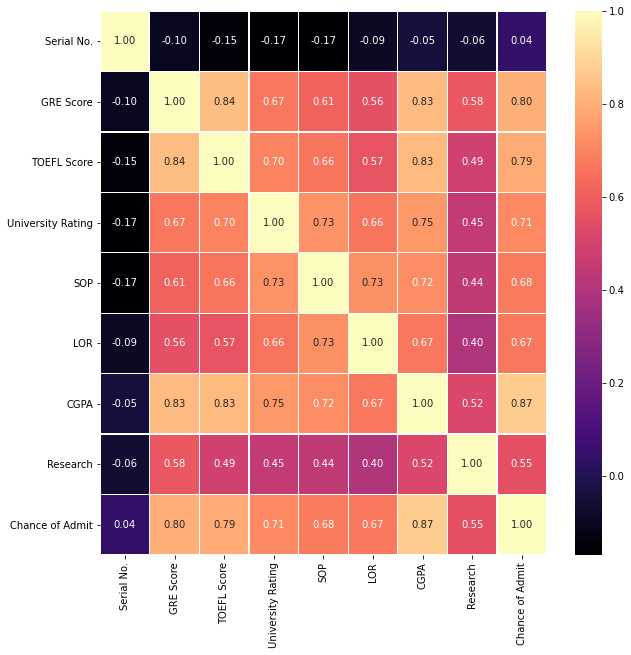

In [14]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [15]:
df.Research.value_counts()

1    219
0    181
Name: Research, dtype: int64

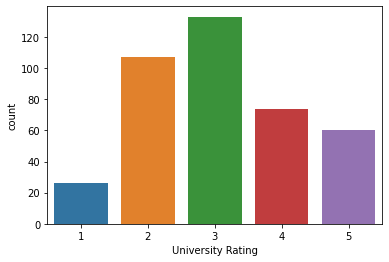

In [16]:
sns.countplot(x="University Rating",data=df)
plt.show()

<AxesSubplot:xlabel='University Rating', ylabel='count'>

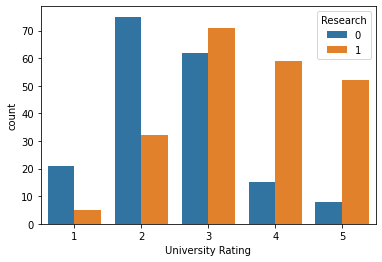

In [17]:
sns.countplot(x="University Rating",hue="Research",data=df)

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit'>

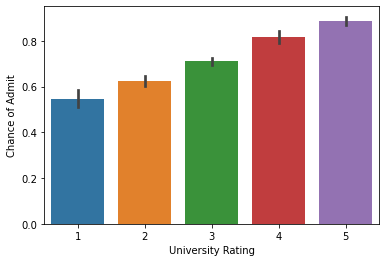

In [18]:
sns.barplot(x="University Rating", y="Chance of Admit", data=df)

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit'>

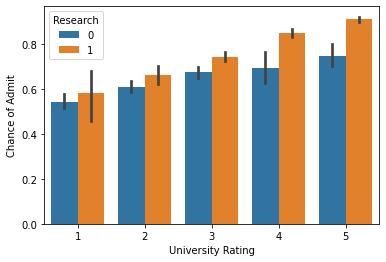

In [19]:
sns.barplot(x="University Rating", y="Chance of Admit", hue="Research", data=df)

In [20]:
df.drop(["Serial No."],axis=1,inplace = True)

df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [21]:
y = df["Chance of Admit"]

X = df.drop(["Chance of Admit"],axis=1)

# TRAINING-TESTING DATA

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=42)
X_train
y_test

209    0.68
280    0.68
33     0.90
210    0.79
93     0.44
       ... 
246    0.72
227    0.64
369    0.67
176    0.90
289    0.79
Name: Chance of Admit, Length: 80, dtype: float64

Data Normalization: Normalization is used to scale the data of an attribute so that it falls in a smaller range, such as -1.0 to 1.0 or 0.0 to 1.0. It is generally useful for classification algorithms.

In [23]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
X_train[X_train.columns] = scalerX.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scalerX.transform(X_test[X_test.columns])
X_train

<ipython-input-23-7a60534ecd9a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[X_train.columns] = scalerX.fit_transform(X_train[X_train.columns])
C:\Users\nijha\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-23-7a60534ecd9a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0
18,0.56,0.642857,0.50,0.750,0.500,0.641026,0.0
202,1.00,1.000000,1.00,0.875,0.875,0.996795,1.0
250,0.60,0.428571,0.50,0.500,0.375,0.567308,1.0
274,0.50,0.285714,0.00,0.250,0.375,0.368590,0.0
...,...,...,...,...,...,...,...
71,0.92,0.714286,1.00,1.000,1.000,0.948718,1.0
106,0.78,0.678571,0.75,0.875,0.875,0.762821,1.0
270,0.32,0.464286,0.25,0.375,0.500,0.455128,1.0
348,0.24,0.250000,0.00,0.250,0.250,0.144231,0.0


# LINEAR REGRESSION

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

score=model.score(X_test, y_test)
print(score)

0.8212082591486991


In [25]:
print (y_predict[0:5])

[0.65117446 0.72368741 0.93536809 0.82164316 0.58158673]


In [26]:
print(y_test[0:5])

209    0.68
280    0.68
33     0.90
210    0.79
93     0.44
Name: Chance of Admit, dtype: float64


In [27]:
#entering the parameters and predicting chance of admission
gre=int(input("What is your GRE Score (between 290 to 340):"))
toefl=int(input("What is your TOEFL Score (between 90 to 120):"))
univ=int(input("What is your University Rating ( 1 to 5 ):"))
sop=int(input("Rate your Statement of Purpose ( 1 to 5):"))
lor=int(input("What is strength of  your Letter of Recommendation ( 1 to 5) :"))
cgpa=int(input("What is your CGPA ( 6 to 10):"))
research=int(input("Do You have Research Experience (Enter 0 for No and 1 for Yes:"))

What is your GRE Score (between 290 to 340):310
What is your TOEFL Score (between 90 to 120):110
What is your University Rating ( 1 to 5 ):4
Rate your Statement of Purpose ( 1 to 5):5
What is strength of  your Letter of Recommendation ( 1 to 5) :5
What is your CGPA ( 6 to 10):9
Do You have Research Experience (Enter 0 for No and 1 for Yes:1


In [28]:
newx=[[gre,toefl,univ,sop,lor,cgpa,research]]

newy=model.predict(newx)

print("Your Chance of Admission is: ",newy)


Your Chance of Admission is:  [41.29066022]


# RANDOM FOREST REGRESSOR

In [29]:

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfr.fit(X_train,y_train)
y_predict_rfr = rfr.predict(X_test) 

score_rfr=rfr.score(X_test, y_test)
print(score_rfr)

0.8096426648595173


# DECISION TREE REGRESSOR

In [30]:

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(X_train,y_train)
y_predict_dtr = dtr.predict(X_test) 

score_dtr=dtr.score(X_test, y_test)
print(score_dtr)

0.6096073383171123


In [31]:
print('Coefficients: \n', model.coef_)
print(model.intercept_)

Coefficients: 
 [ 0.09312548  0.07626324  0.0295098  -0.00117097  0.06308097  0.35776778
  0.02222705]
0.36307849847239293


In [32]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})
df

,Actual,Predicted
209,0.68,0.651174
280,0.68,0.723687
33,0.90,0.935368
210,0.79,0.821643
93,0.44,0.581587
...,...,...
246,0.72,0.721818
227,0.64,0.689644
369,0.67,0.594426
176,0.90,0.878406


In [33]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np


In [34]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.04795673362091198
Mean Squared Error: 0.00461700337728501
Root Mean Squared Error: 0.06794853476922817


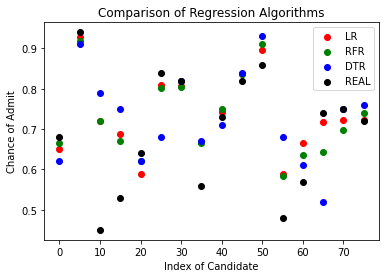

In [35]:
import numpy as np
red = plt.scatter(np.arange(0,80,5),y_predict[0:80:5],color = "red")
green = plt.scatter(np.arange(0,80,5),y_predict_rfr[0:80:5],color = "green")
blue = plt.scatter(np.arange(0,80,5),y_predict_dtr[0:80:5],color = "blue")
black = plt.scatter(np.arange(0,80,5),y_test[0:80:5],color = "black")
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Index of Candidate")
plt.ylabel("Chance of Admit")
plt.legend((red,green,blue,black),('LR', 'RFR', 'DTR', 'REAL'))
plt.show()